In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML, display
import time

In [2]:
# Read data from CSV file
file_path = "WsnData.csv"
df = pd.read_csv(file_path)

np.random.seed(0)

data = df[['X', 'Y']].iloc[:100].values  # Considering only the first 100 instances
sensor_ids = df['SensorID'].iloc[:100].values
initial_battery_life = df['BatteryLife'].iloc[:100].values
data_rows = df[['SensorID', 'SensorType', 'X', 'Y', 'SensorData', 'BatteryLife', 'Temperature']].iloc[:10]

print("{:<9}{:<12}\t{:<12}\t{:<12}\t{:<12}\t{:<12}\t{:<12}".format(
    'SensorID', 'SensorType', 'X', 'Y', 'SensorData', 'BatteryLife', 'Temperature'))

for _, row in data_rows.iterrows():
    print("{:<9}{:<12}\t{:<12.6f}\t{:<12.6f}\t{:<12.6f}\t{:<12.6f}\t{:<12.6f}".format(
        row['SensorID'], row['SensorType'], row['X'], row['Y'], row['SensorData'],
        row['BatteryLife'], row['Temperature']))

print()

SensorID SensorType  	X           	Y           	SensorData  	BatteryLife 	Temperature 
1        Temperature 	32.300556   	21.575965   	51.396271   	73.533551   	53.793287   
2        Humidity    	61.588405   	96.030429   	15.024628   	73.435270   	50.867584   
3        Pressure    	17.543522   	75.573323   	62.117308   	73.372619   	49.905307   
4        Temperature 	75.932405   	92.519359   	75.547331   	73.281948   	49.990236   
5        Humidity    	13.461775   	14.773697   	20.536293   	73.227014   	48.288018   
6        Pressure    	52.284626   	57.786310   	57.669704   	73.226331   	50.917529   
7        Temperature 	72.835066   	44.089080   	46.589397   	73.192407   	49.854579   
8        Humidity    	21.445063   	11.981194   	96.503712   	73.146337   	52.370747   
9        Pressure    	80.056236   	5.977020    	96.195409   	73.068600   	53.252575   
10       Temperature 	88.557544   	56.115244   	21.799012   	73.014032   	54.420299   



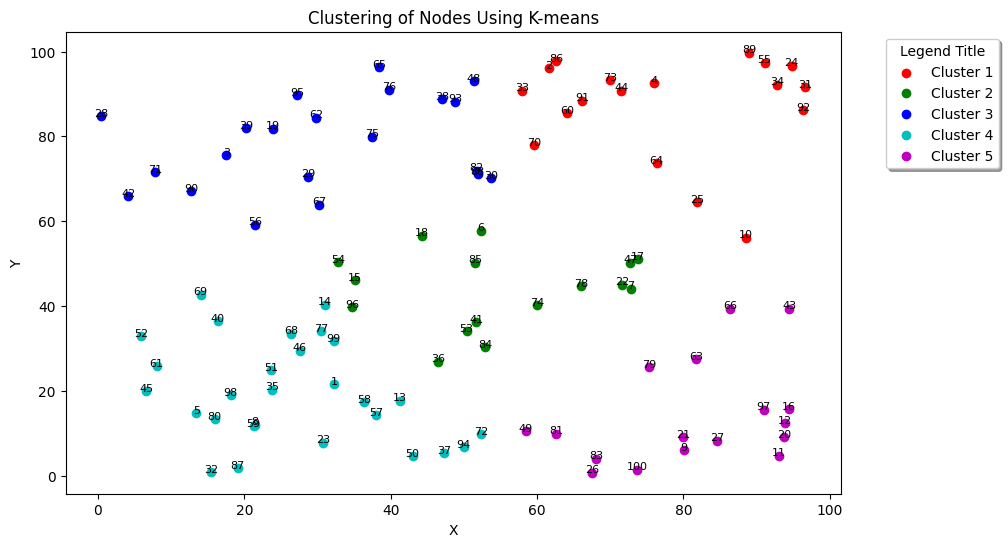

In [3]:
# Perform K-means clustering
np.random.seed(0)

k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm']  

for i in range(k):
    cluster_points = data[labels == i]
    node_numbers = sensor_ids[labels == i] 

    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

    for j, (x, y) in enumerate(cluster_points):
        plt.annotate(int(node_numbers[j]), (x, y), fontsize=8, ha='center', va='baseline')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering of Nodes Using K-means')
plt.legend(loc='upper left', fontsize=10, title='Legend Title', title_fontsize=10, shadow=True, frameon=True, bbox_to_anchor=(1.05, 1))


plt.show()

Cluster Head Details:
Cluster   SensorID    X           Y           
Cluster 1 4           75.932405   92.519359   
Cluster 2 85          51.543442   50.206109   
Cluster 3 62          29.821840   84.412502   
Cluster 4 35          23.812976   20.239964   
Cluster 5 21          79.943469   9.113813    


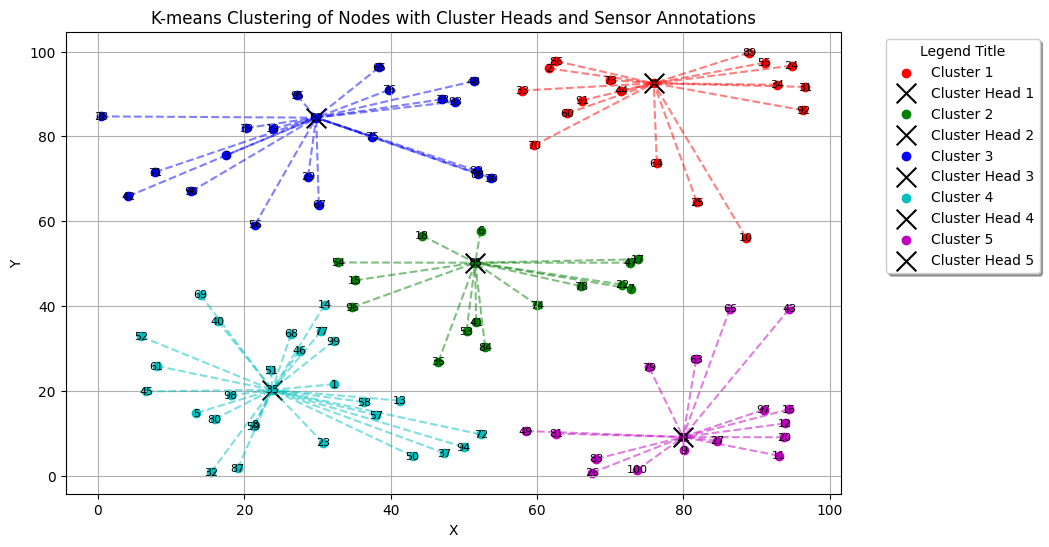

Cluster 1 Details:
Node No. SensorID    	SensorType  	X           	Y           	SensorData  	BatteryLife 	Temperature 
1        4           	Temperature 	75.932405   	92.519359   	75.547331   	73.281948   	49.990236   
2        2           	Humidity    	61.588405   	96.030429   	15.024628   	73.435270   	50.867584   
3        4           	Temperature 	75.932405   	92.519359   	75.547331   	73.281948   	49.990236   
4        10          	Temperature 	88.557544   	56.115244   	21.799012   	73.014032   	54.420299   
5        24          	Pressure    	94.777394   	96.674960   	69.044237   	72.386606   	60.914194   
6        25          	Temperature 	81.824794   	64.546957   	88.799789   	72.371337   	61.601323   
7        31          	Temperature 	96.657950   	91.666539   	10.571524   	72.068235   	59.463516   
8        33          	Pressure    	57.925960   	90.806179   	9.479839    	72.000992   	56.899631   
9        34          	Temperature 	92.781635   	92.176225   	97.857674   	71.9895

In [4]:
# Select cluster head based on closest point to centroid
np.random.seed(0)

cluster_heads = []
initial_cluster_heads = []
cluster_nodes = []
for i in range(k):
    cluster_points = data[labels == i]
    centroid = centroids[i]
    distances_to_centroid = np.linalg.norm(cluster_points - centroid, axis=1)
    cluster_head_index = np.argmin(distances_to_centroid)
    cluster_head = cluster_points[cluster_head_index]
    cluster_heads.append(cluster_head)
    initial_cluster_heads.append(cluster_head)

    cluster_sensor_ids = sensor_ids[labels == i]
    cluster_nodes.append(cluster_sensor_ids)

print("Cluster Head Details:")
print("{:<10}{:<12}{:<12}{:<12}".format("Cluster", "SensorID", "X", "Y"))
for i, cluster_head in enumerate(cluster_heads):
    cluster_head_index = np.where((df['X'] == cluster_head[0]) & (df['Y'] == cluster_head[1]))[0][0]
    cluster_head_details = df.iloc[cluster_head_index]
    print("{:<10}{:<12}{:<12.6f}{:<12.6f}".format(
        f"Cluster {i+1}", cluster_head_details['SensorID'], cluster_head_details['X'], cluster_head_details['Y']))


plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm','y']  

for i in range(k):
    cluster_points = data[labels == i]
    node_numbers = cluster_nodes[i] 
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

    for j, (x, y) in enumerate(cluster_points):
        plt.annotate(int(node_numbers[j]), (x, y), fontsize=8, ha='center', va='center')

    # Plot cluster heads
    current_cluster_head = cluster_heads[i]
    plt.scatter(current_cluster_head[0], current_cluster_head[1], marker='x', s=200, c='k', label=f'Cluster Head {i+1}')

    for node in cluster_points:
        plt.plot([node[0], cluster_heads[i][0]], [node[1], cluster_heads[i][1]], c=colors[i], alpha=0.5, linestyle='--')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering of Nodes with Cluster Heads and Sensor Annotations')
plt.grid(True)
plt.legend(loc='upper left', fontsize=10, title='Legend Title', title_fontsize=10, shadow=True, frameon=True, bbox_to_anchor=(1.05, 1))

plt.show()

node_number = 1 
for i, cluster_head in enumerate(cluster_heads):
    print(f"Cluster {i+1} Details:")
    print("{:<9}{:<12}\t{:<12}\t{:<12}\t{:<12}\t{:<12}\t{:<12}\t{:<12}".format(
        "Node No.", "SensorID", "SensorType", "X", "Y", "SensorData", "BatteryLife", "Temperature"))

    cluster_head_index = np.where((df['X'] == cluster_head[0]) & (df['Y'] == cluster_head[1]))[0][0]

    cluster_head_details = df.iloc[cluster_head_index]
    print("{:<9}{:<12}\t{:<12}\t{:<12.6f}\t{:<12.6f}\t{:<12.6f}\t{:<12.6f}\t{:<12.6f}".format(
        node_number, cluster_head_details['SensorID'], cluster_head_details['SensorType'],
        cluster_head_details['X'], cluster_head_details['Y'], cluster_head_details['SensorData'],
        cluster_head_details['BatteryLife'], cluster_head_details['Temperature']))

    cluster_points = data[labels == i]
    for point in cluster_points:
        data_row = df[(df['X'] == point[0]) & (df['Y'] == point[1])].iloc[0]
        node_number += 1  # Increment node number
        print("{:<9}{:<12}\t{:<12}\t{:<12.6f}\t{:<12.6f}\t{:<12.6f}\t{:<12.6f}\t{:<12.6f}".format(
            node_number, data_row['SensorID'], data_row['SensorType'],
            data_row['X'], data_row['Y'], data_row['SensorData'],
            data_row['BatteryLife'], data_row['Temperature']))

    print()

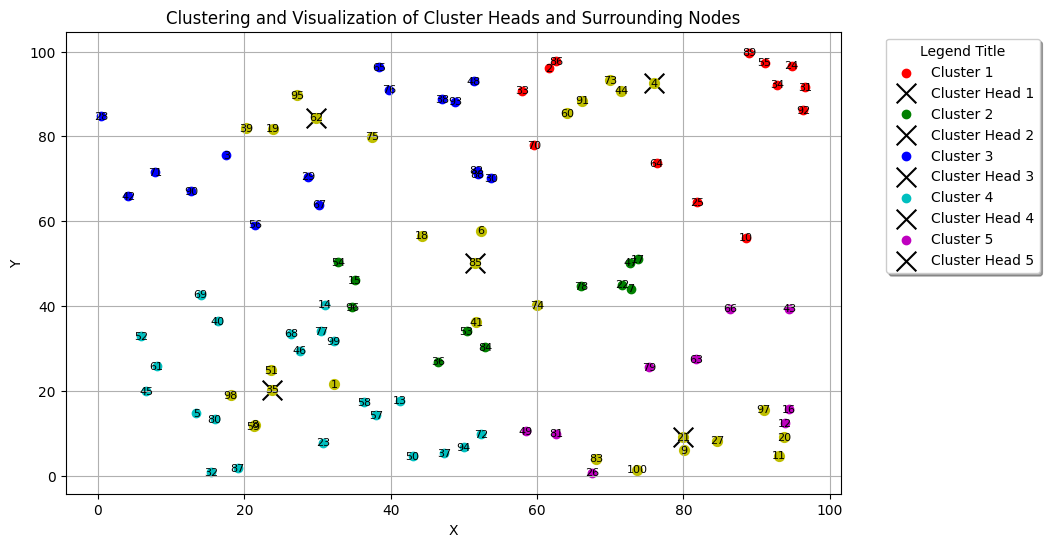

Cluster 1:
Distance Threshold: 15.5
Surrounding Nodes:
SensorID SensorType  	X           	Y           	SensorData  	BatteryLife 	Temperature 
4        Temperature 	75.932405   	92.519359   	75.547331   	73.281948   	49.990236   
44       Humidity    	71.518910   	90.778737   	97.535853   	71.544869   	49.375006   
60       Pressure    	64.071483   	85.399915   	64.558640   	70.556313   	56.237619   
73       Temperature 	69.985305   	93.287895   	15.357512   	69.841961   	47.266680   
91       Temperature 	66.128506   	88.458812   	37.606474   	68.775452   	34.886235   
Cluster 2:
Distance Threshold: 15.5
Surrounding Nodes:
SensorID SensorType  	X           	Y           	SensorData  	BatteryLife 	Temperature 
6        Pressure    	52.284626   	57.786310   	57.669704   	73.226331   	50.917529   
18       Pressure    	44.282587   	56.614709   	57.116186   	72.684527   	69.142592   
41       Humidity    	51.669235   	36.239606   	49.287893   	71.631168   	45.442023   
74       Humidity   

In [5]:
np.random.seed(0)

surrounding_nodes = []
distance_thresholds = []
for i in range(k):
    cluster_points = data[labels == i]
    current_cluster_head = initial_cluster_heads[i]
    distance_threshold = 5.0
    surrounding_nodes_cluster = []
    while len(surrounding_nodes_cluster) <= 4:
        surrounding_nodes_cluster = [point for point in cluster_points
                                     if np.linalg.norm(point - current_cluster_head) <= distance_threshold]
        distance_threshold += 1.5
    surrounding_nodes.append(surrounding_nodes_cluster)
    distance_thresholds.append(distance_threshold)

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y'] 
for i in range(k):
    cluster_points = data[labels == i]
    node_numbers = cluster_nodes[i] 
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
    for j, (x, y) in enumerate(cluster_points):
        plt.annotate(int(node_numbers[j]), (x, y), fontsize=8, ha='center', va='center')
    current_cluster_head = cluster_heads[i]
    plt.scatter(current_cluster_head[0], current_cluster_head[1], marker='x', s=200, c='k', label=f'Cluster Head {i+1}')
    surrounding_nodes_cluster = surrounding_nodes[i]
    for node in surrounding_nodes_cluster:
        plt.scatter(node[0], node[1], c='y', marker='o', s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering and Visualization of Cluster Heads and Surrounding Nodes')
plt.grid(True)

plt.legend(loc='upper left', fontsize=10, title='Legend Title', title_fontsize=10, shadow=True, frameon=True, bbox_to_anchor=(1.05, 1))

filename = f"Surrounding_nodes.png"
plt.savefig(filename, bbox_inches='tight')
plt.show()

node_details = df.loc[df['SensorID'].isin(np.concatenate(cluster_nodes))].reset_index(drop=True)

for i in range(k):
    current_cluster_head = initial_cluster_heads[i]
    surrounding_nodes_cluster = surrounding_nodes[i]
    distance_threshold = distance_thresholds[i]
    print(f"Cluster {i+1}:")
    print(f"Distance Threshold: {distance_threshold}")
    print("Surrounding Nodes:")
    print("{:<9}{:<12}\t{:<12}\t{:<12}\t{:<12}\t{:<12}\t{:<12}".format(
        "SensorID", "SensorType", "X", "Y", "SensorData", "BatteryLife", "Temperature"))
    for node_idx, node in enumerate(surrounding_nodes_cluster):
        matching_rows = node_details.loc[(node_details['X'] == node[0]) & (node_details['Y'] == node[1])]
        if not matching_rows.empty:
            node_details_row = matching_rows.iloc[0]
            print("{:<9}{:<12}\t{:<12.6f}\t{:<12.6f}\t{:<12.6f}\t{:<12.6f}\t{:<12.6f}".format(
                int(node_details_row['SensorID']), node_details_row['SensorType'], node[0], node[1],
                node_details_row['SensorData'], node_details_row['BatteryLife'], node_details_row['Temperature']))
print()
    

Node 41 sends 1 packets to Cluster head 41. Node 41 battery life: 69.63116806
Cluster head 41 received 1 packets from Node 41. Cluster Head 41 battery life : 69.63116806

Node 20 sends 4 packets to Cluster head 83. Node 20 battery life: 29.97531408782134
Cluster head 83 received 4 packets from Node 20. Cluster Head 83 battery life : 60.722643415564264

Node 83 sends 1 packets to Cluster head 83. Node 83 battery life: 58.722643415564264
Cluster head 83 received 1 packets from Node 83. Cluster Head 83 battery life : 58.722643415564264

Node 95 sends 3 packets to Cluster head 39. Node 95 battery life: 37.524575478184296
Cluster head 39 received 3 packets from Node 95. Cluster Head 39 battery life : 65.56558873563685

Node 37 sends 4 packets to Cluster head 51. Node 37 battery life: 28.79852446507757
Cluster head 51 received 4 packets from Node 37. Cluster Head 51 battery life : 62.45219391701552

Node 68 sends 1 packets to Cluster head 51. Node 68 battery life: 59.122754385872724
Cluster 

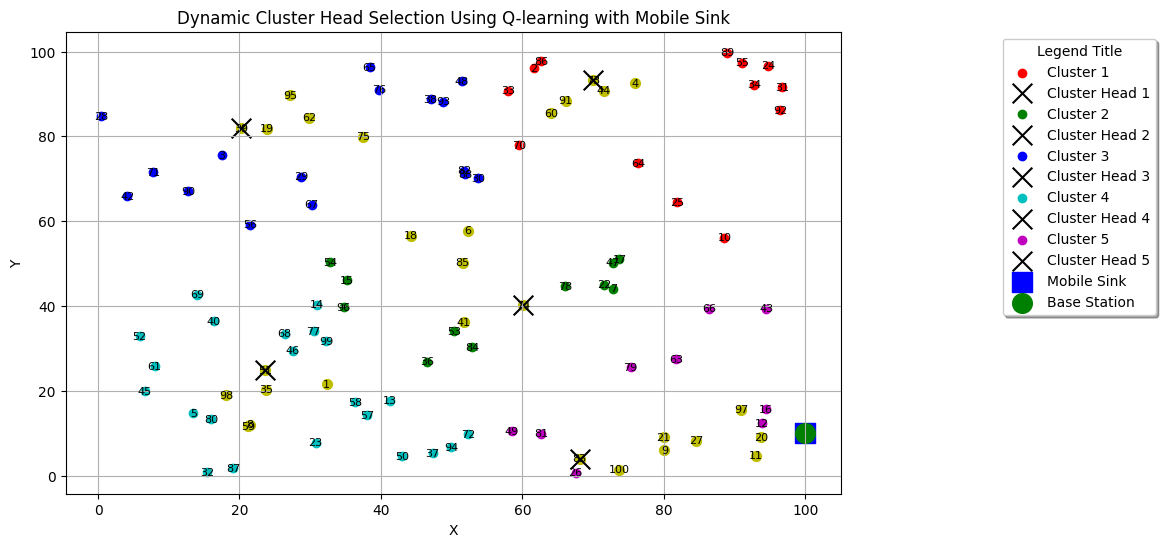

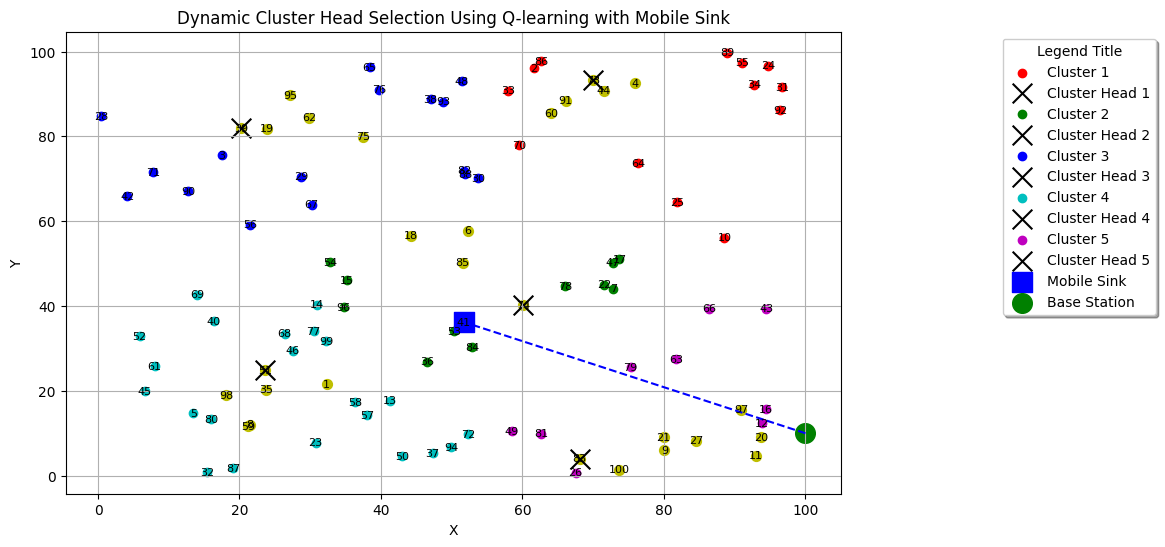

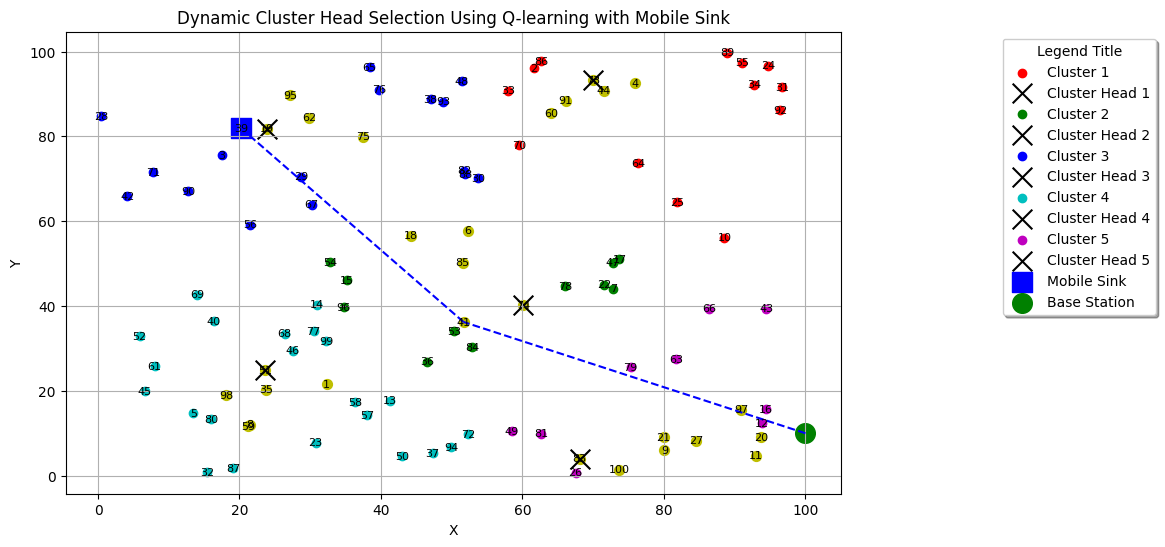

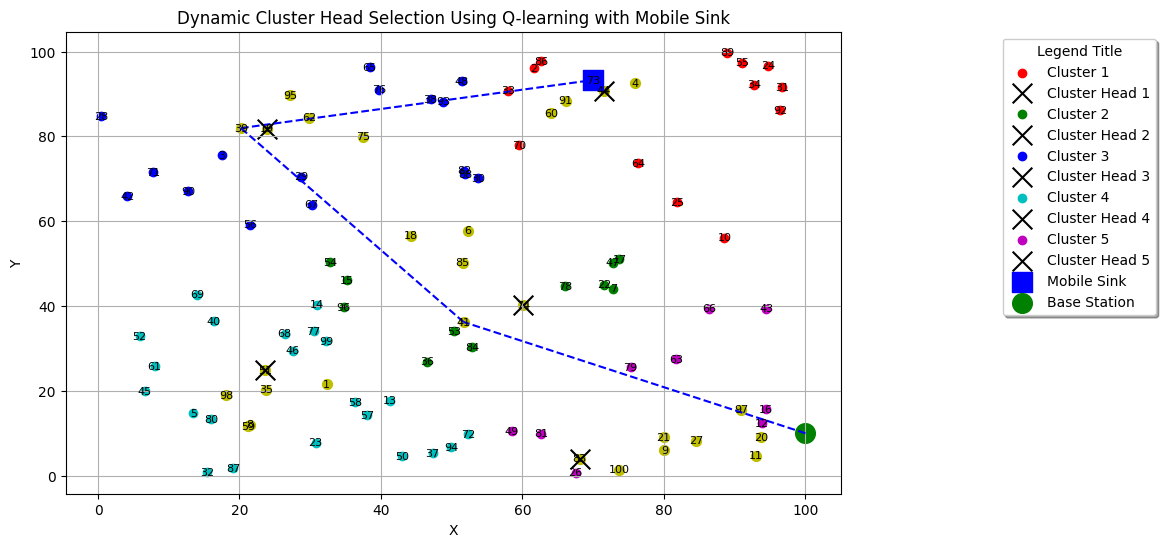

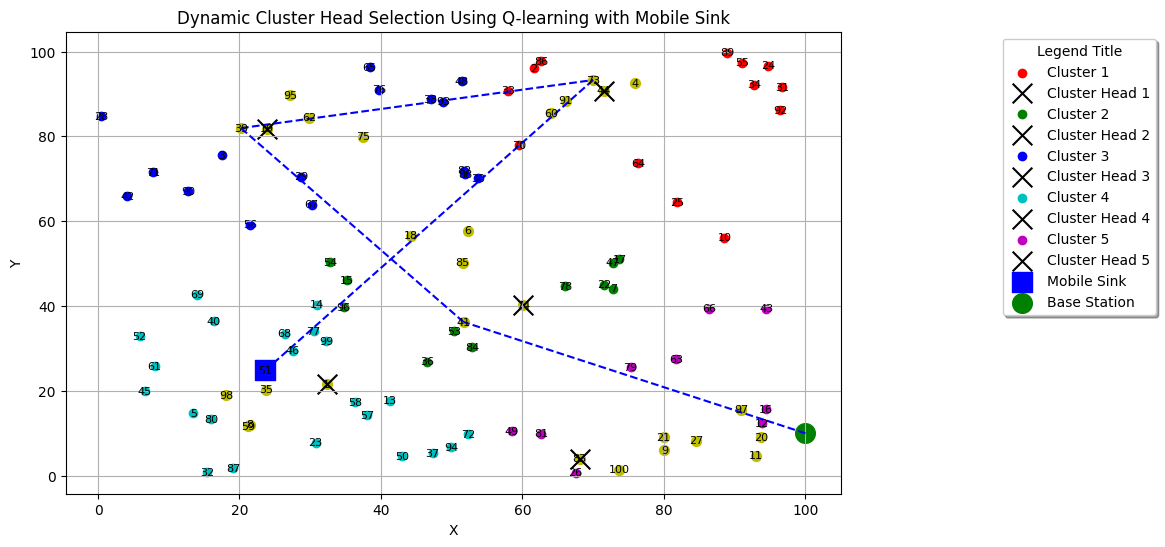

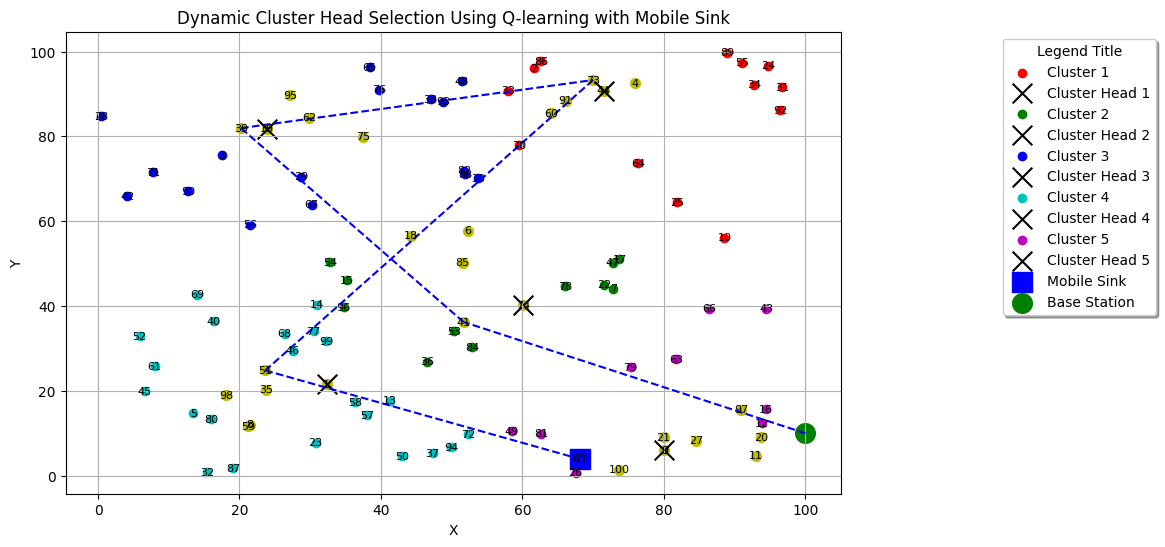

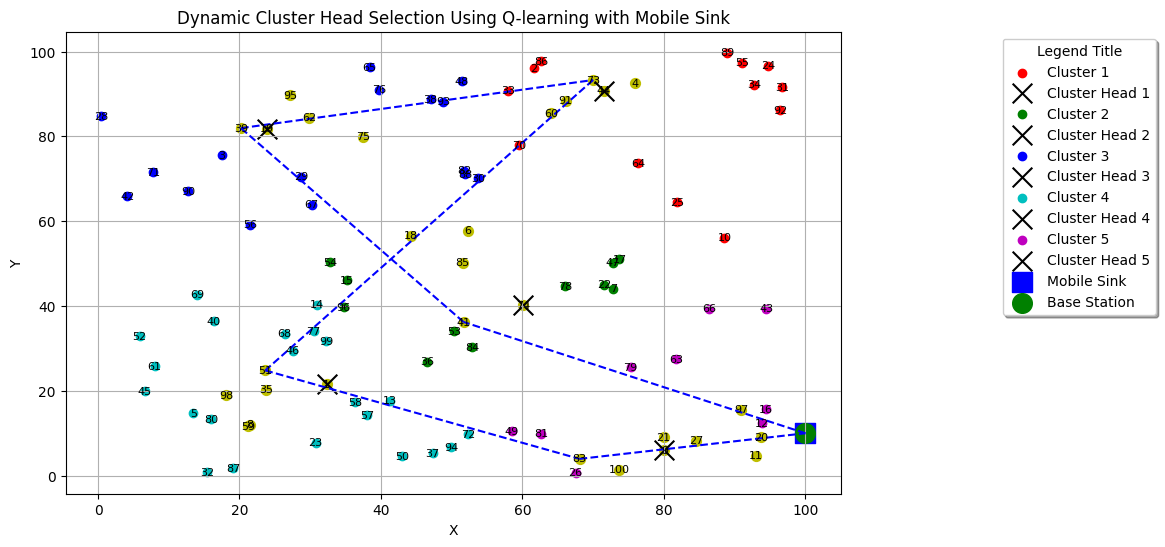

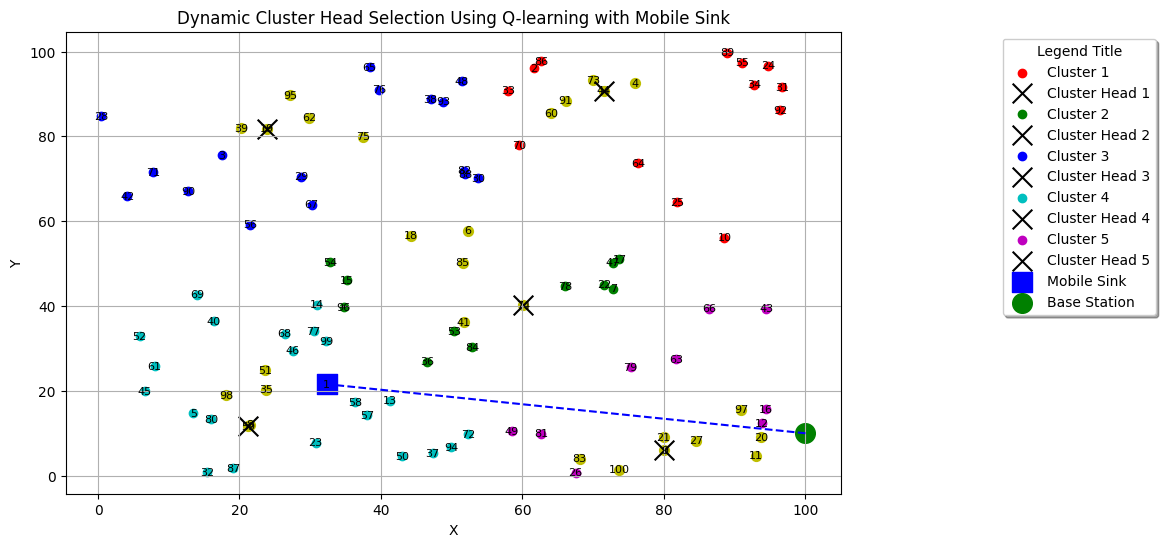

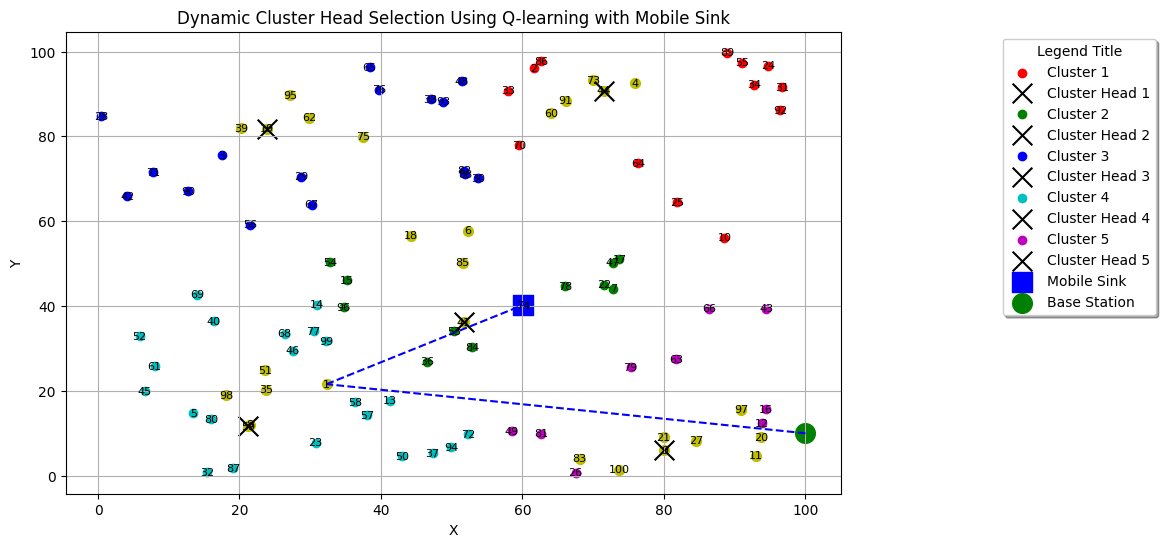

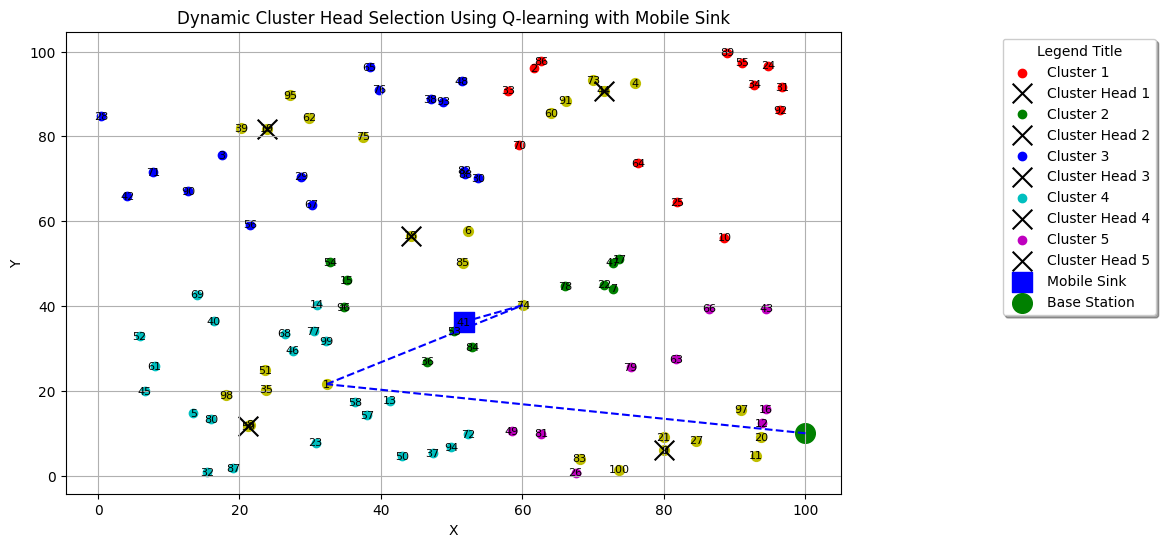

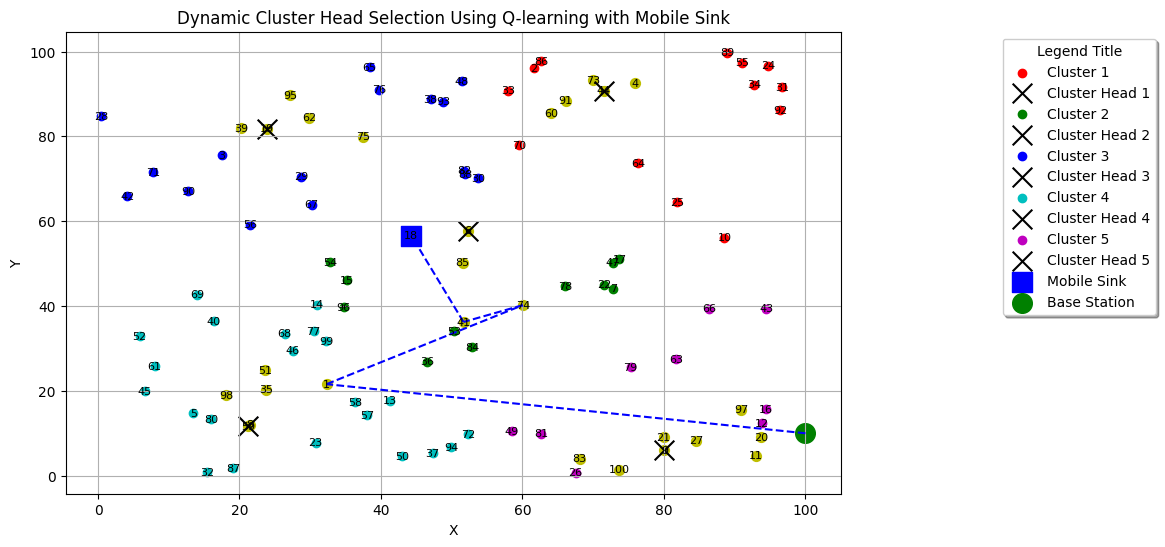

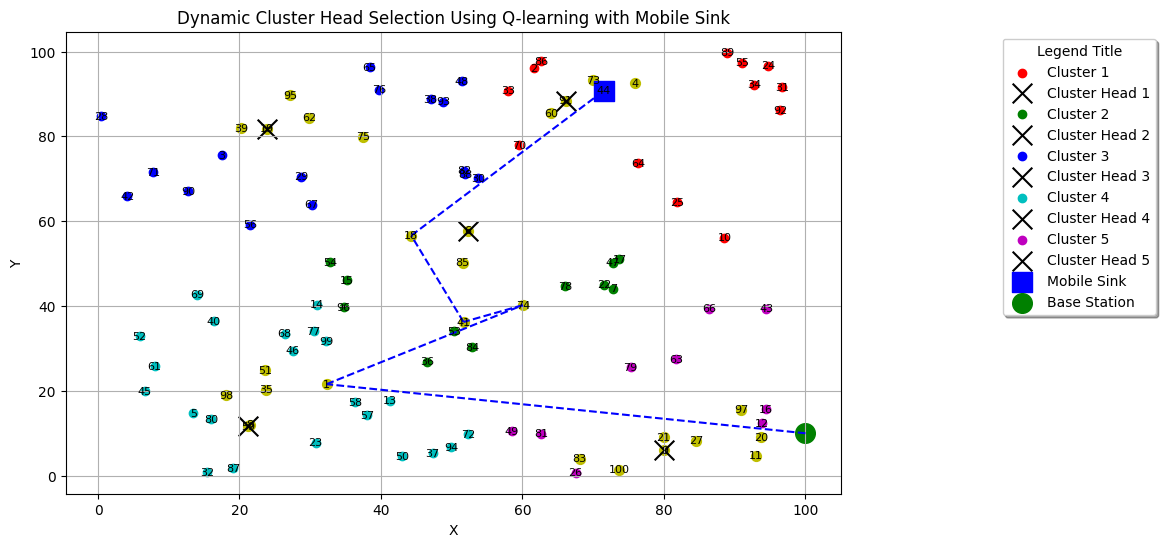

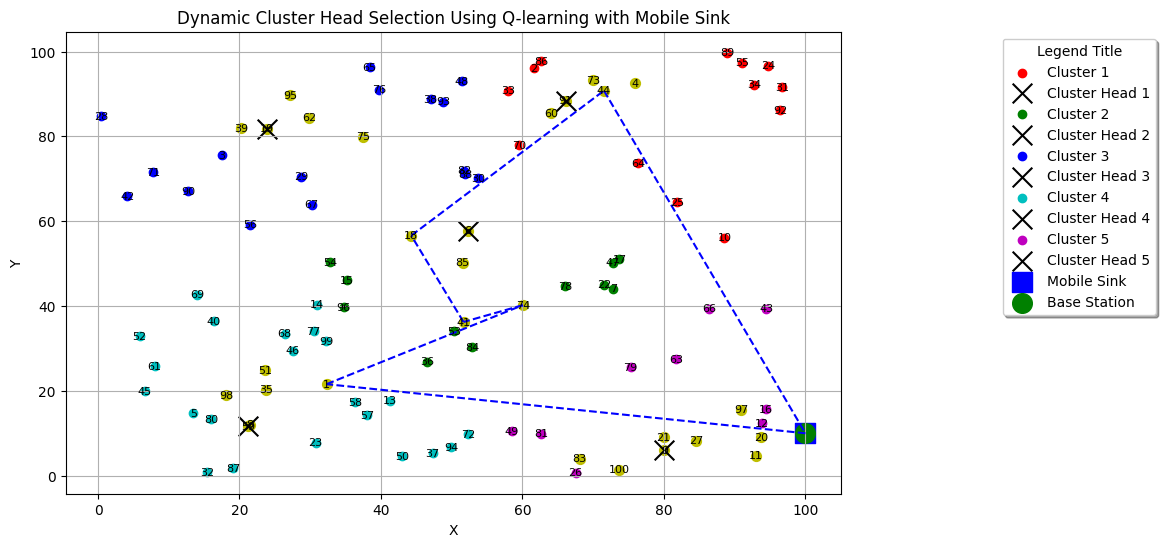

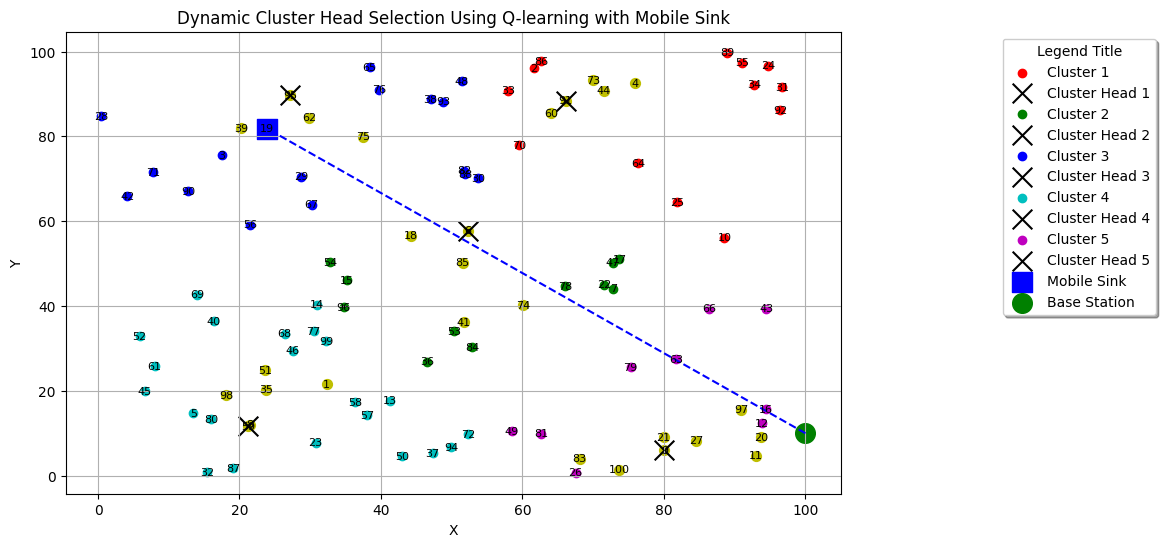

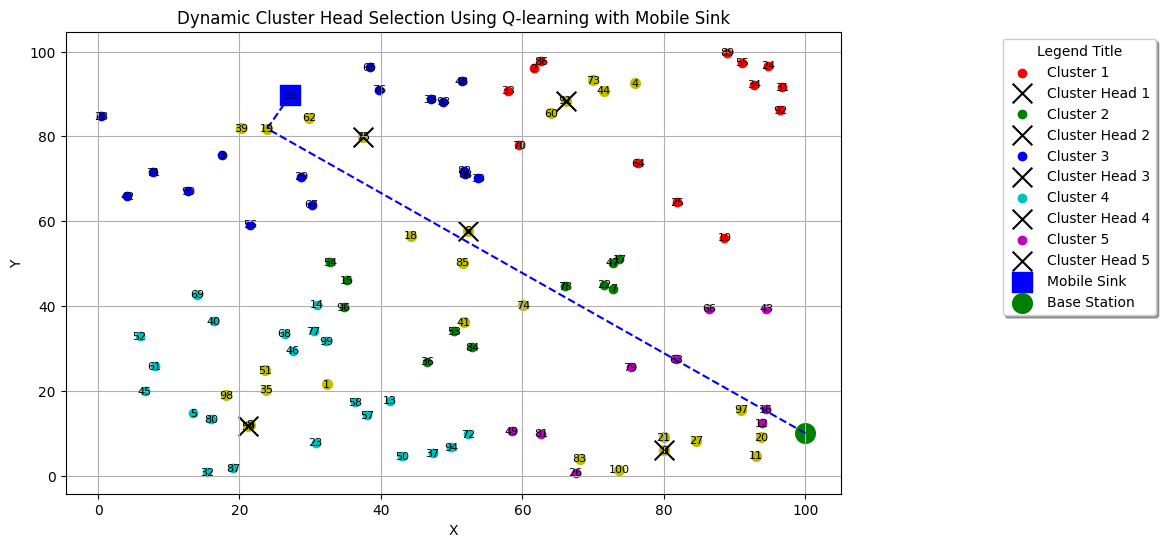

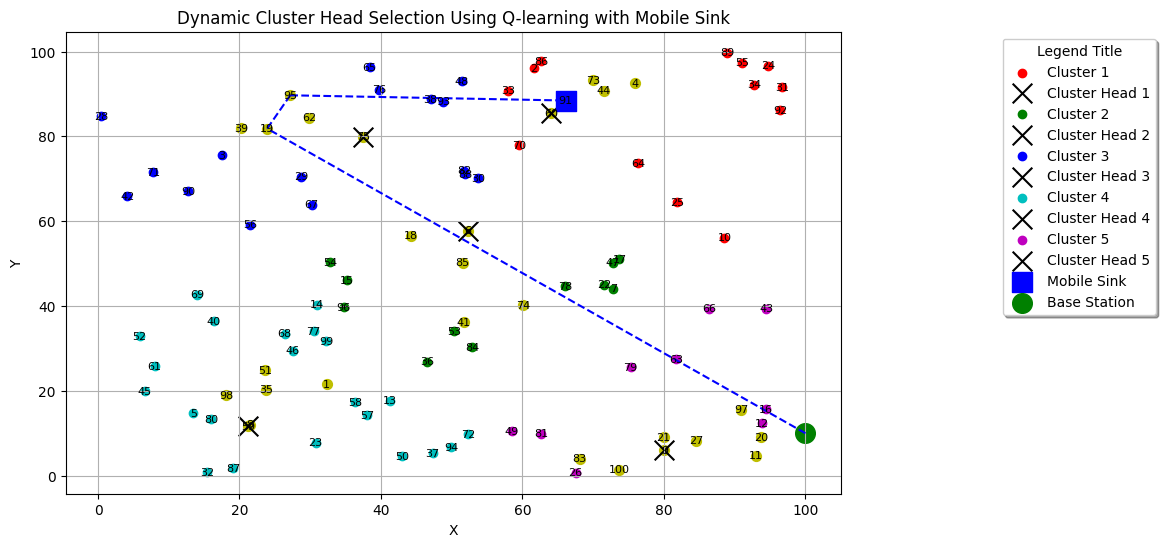

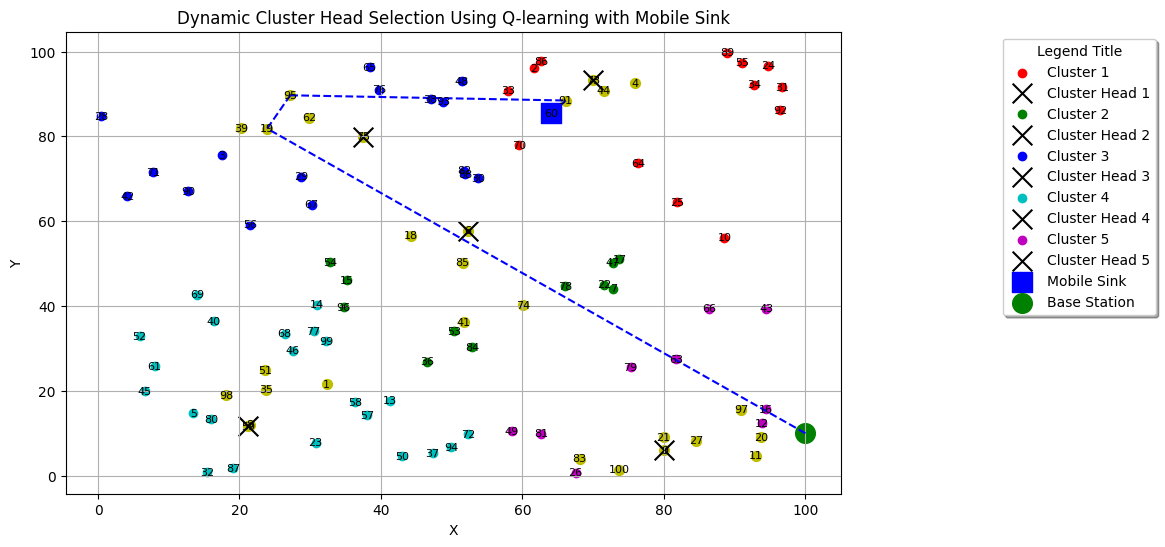

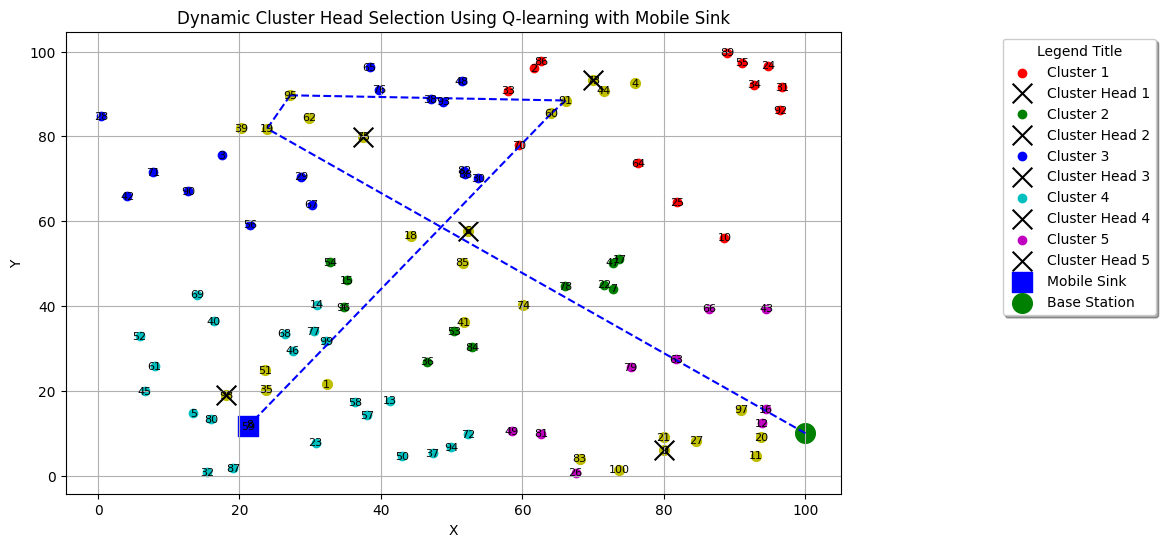

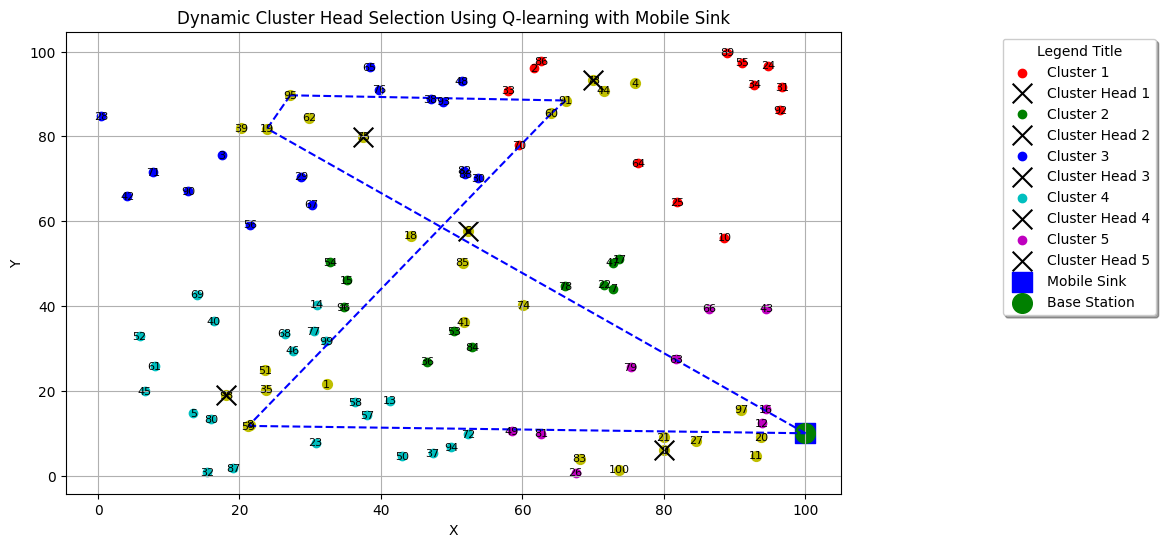

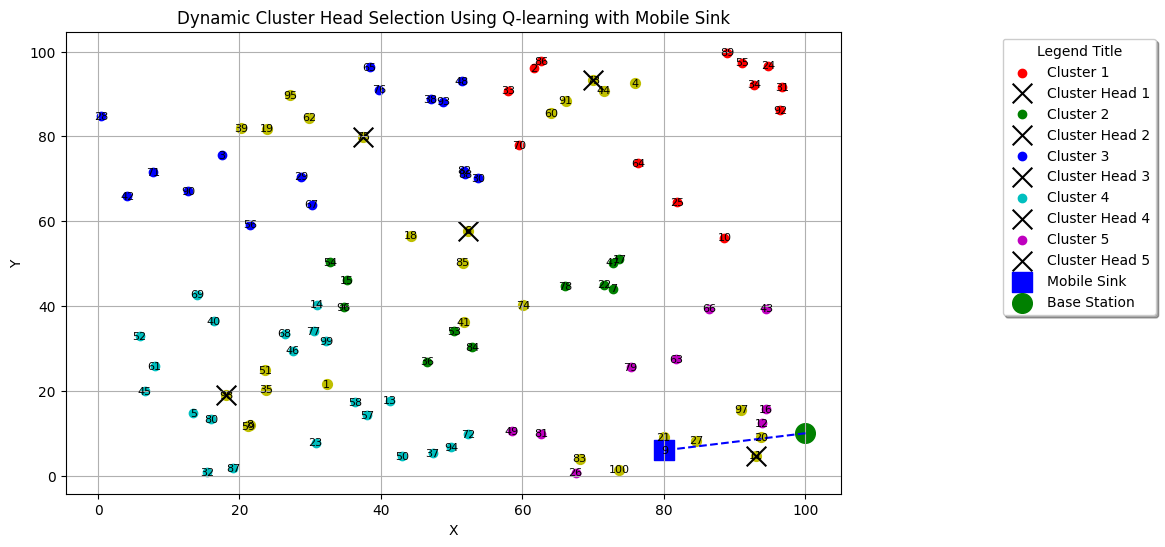

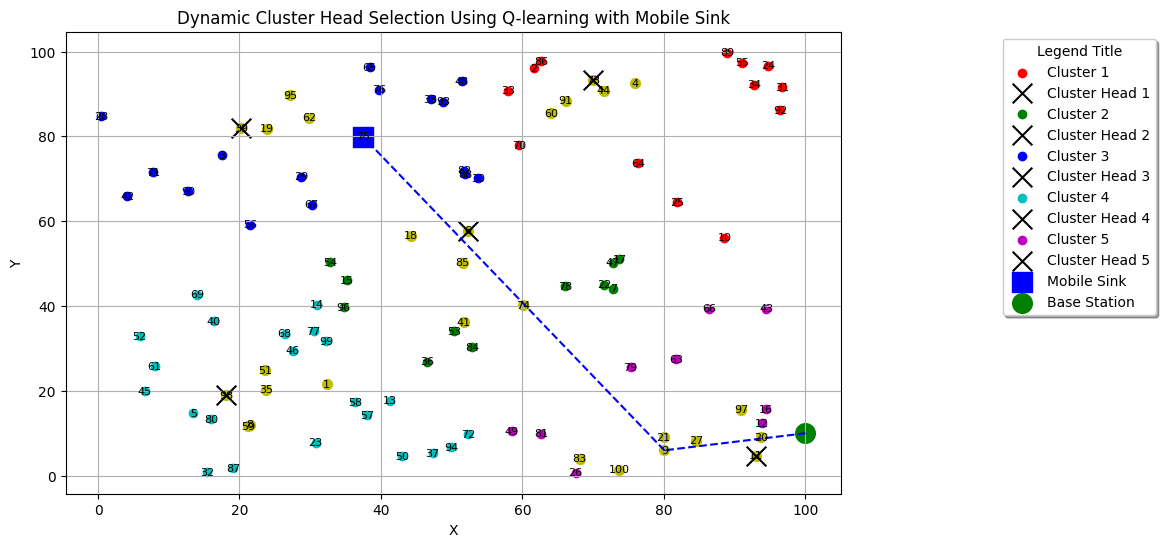

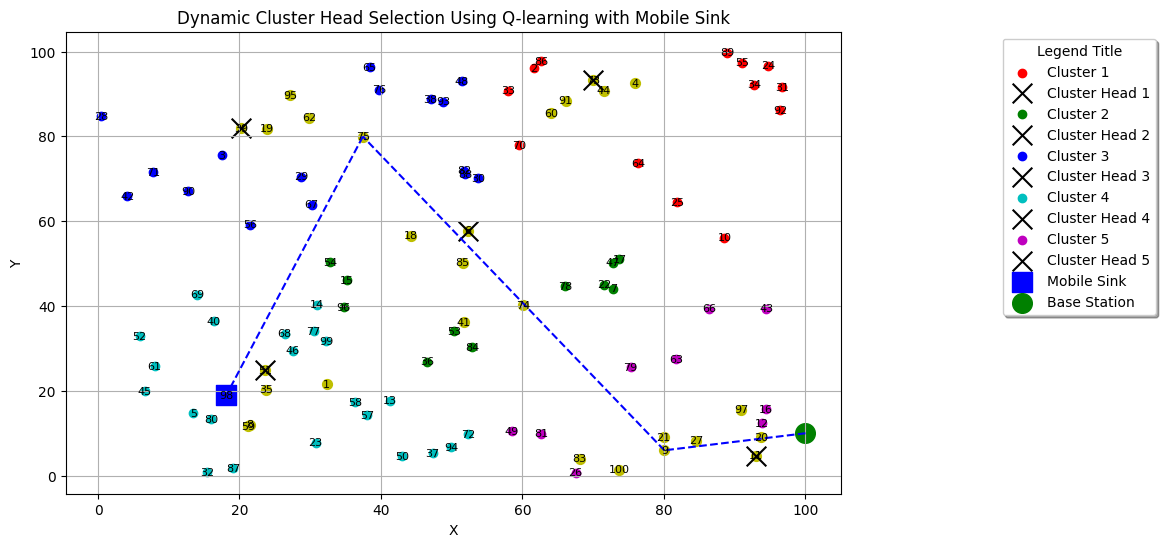

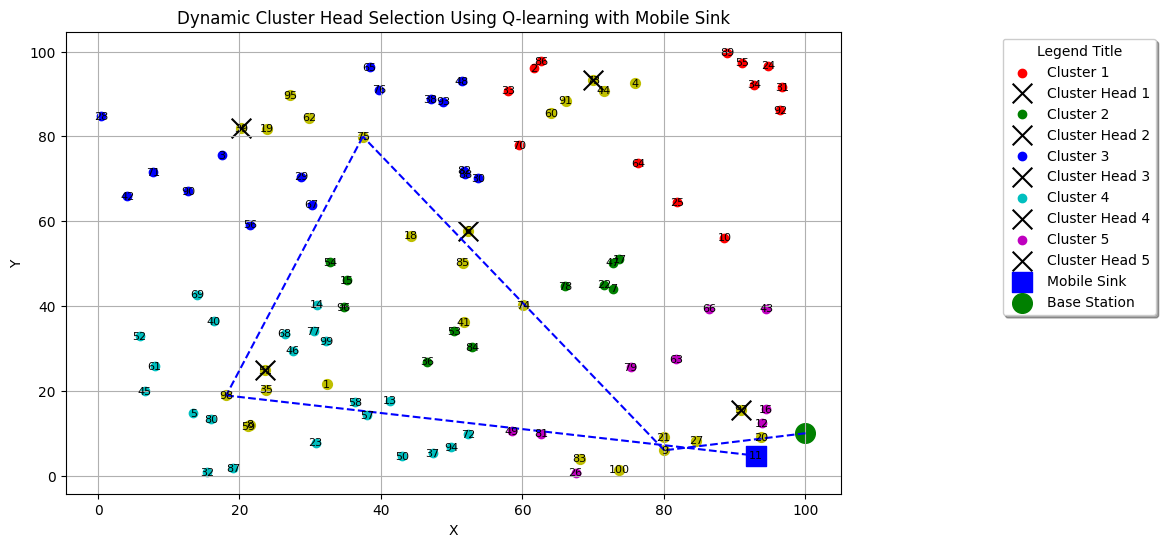

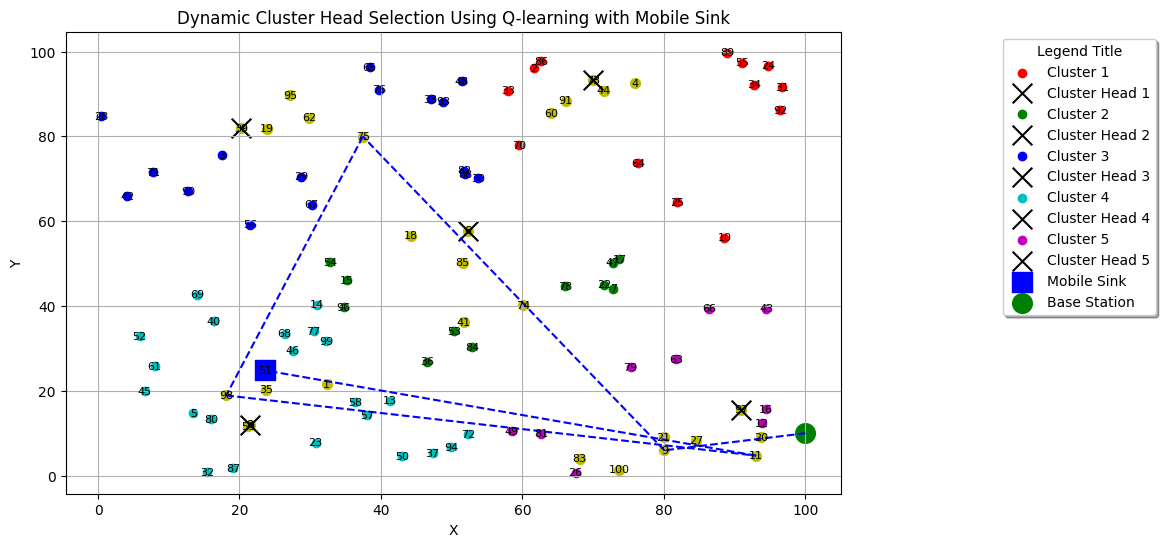

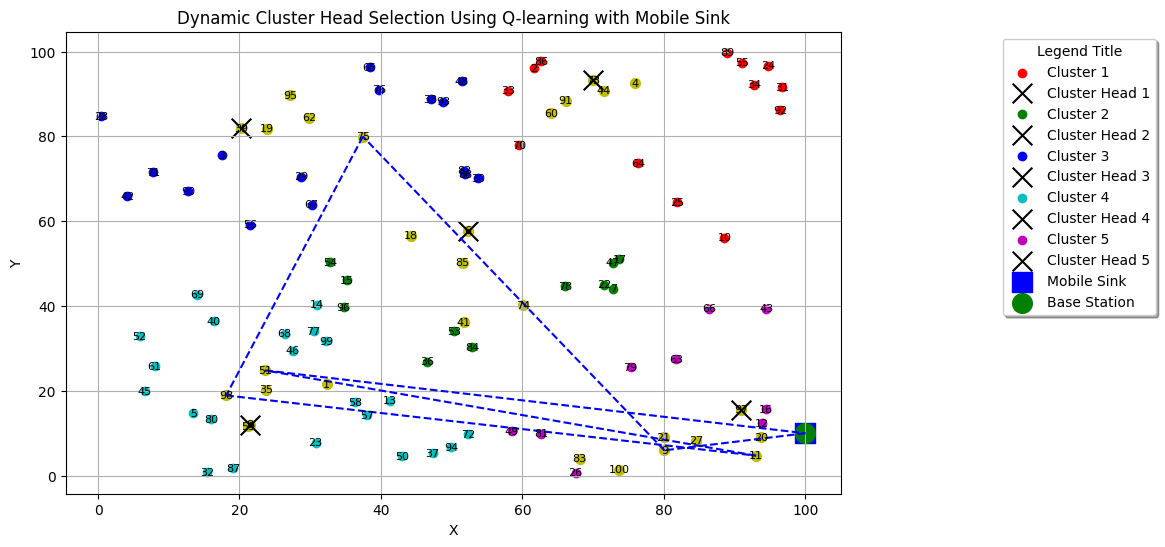

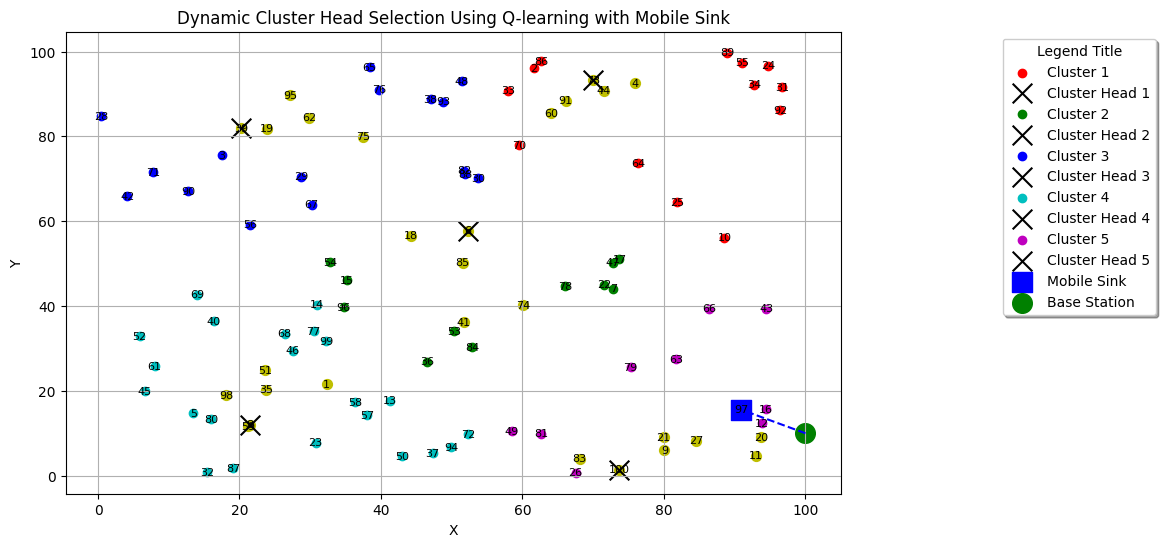

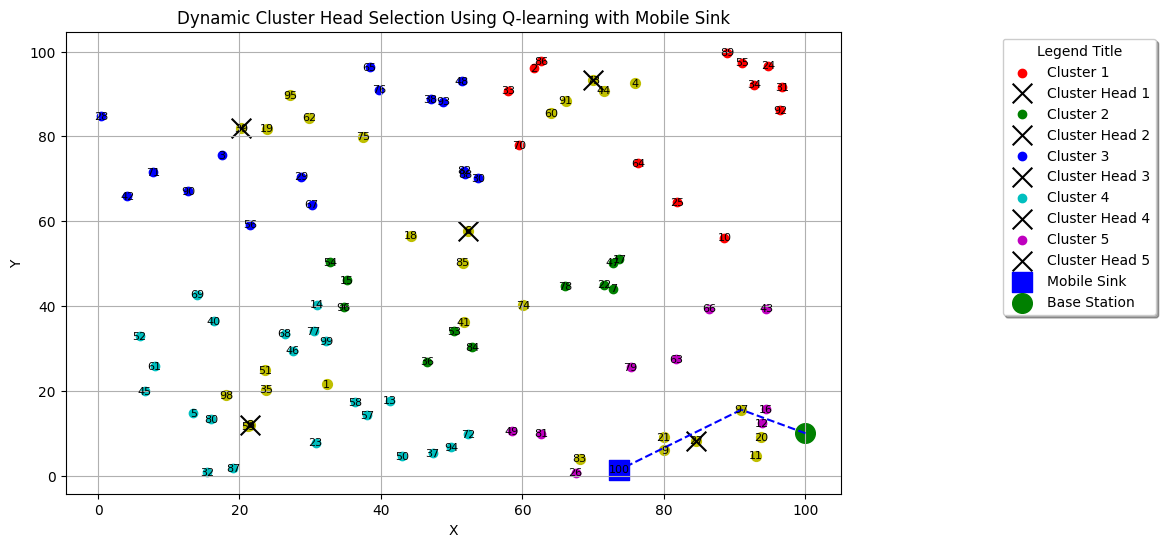

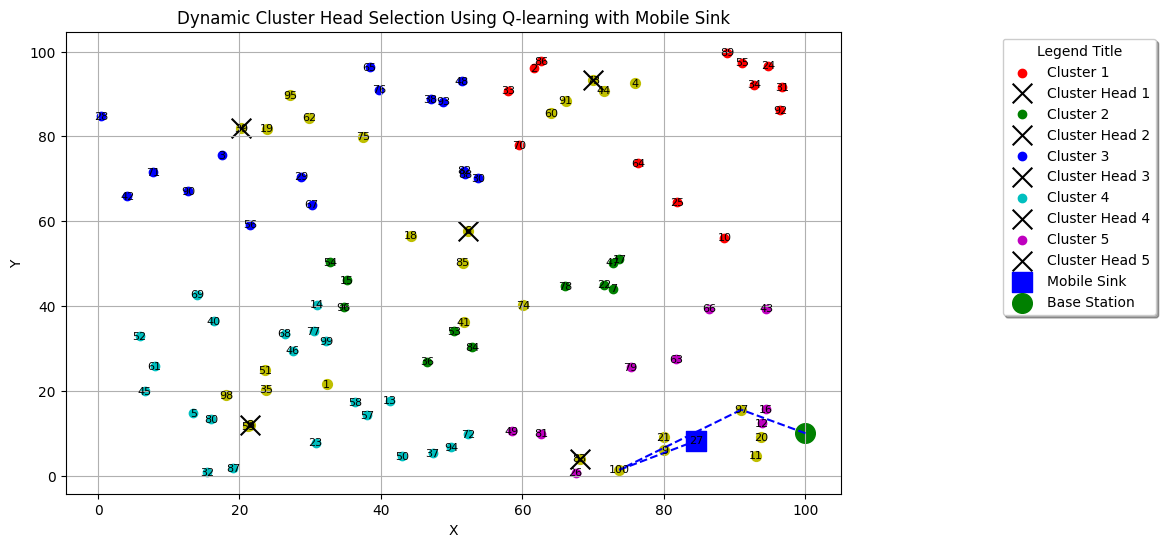

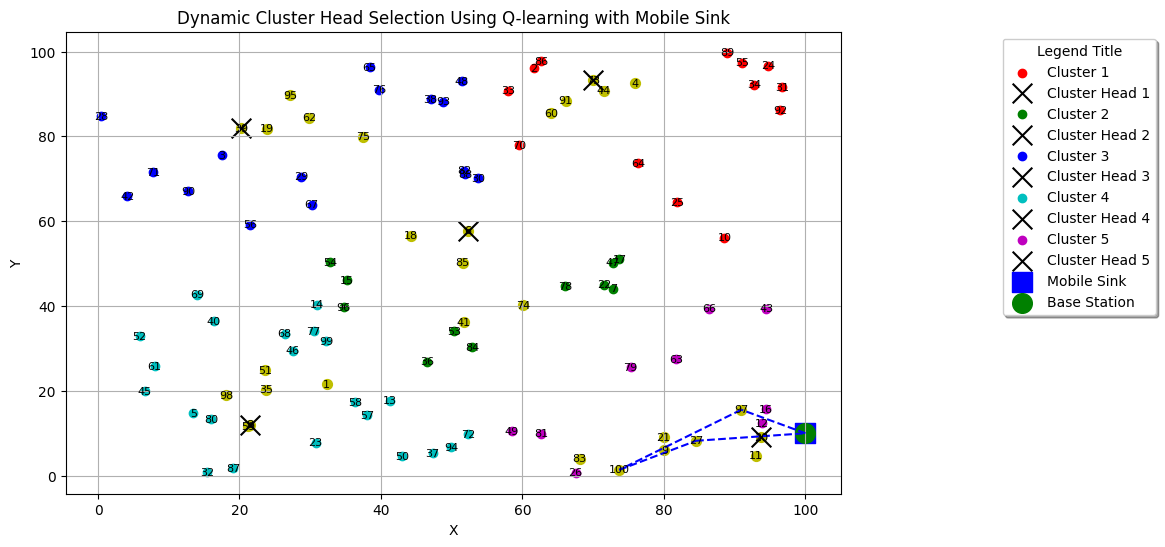

In [8]:
np.random.seed(0)

class QLearningAgent:
    def __init__(self, state_space_size, action_space_size, learning_rate=0.1, discount_factor=0.99):
        self.state_space_size = state_space_size
        self.action_space_size = action_space_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.q_table = np.zeros((state_space_size, action_space_size))

    def get_action(self, state, epsilon=0.1):
        if np.random.uniform() < epsilon:
            return np.random.randint(self.action_space_size)
        else:
            return np.argmax(self.q_table[state, :])

    def update(self, state, action, reward, next_state):
        old_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state, :])
        new_value = (1 - self.learning_rate) * old_value + self.learning_rate * (reward + self.discount_factor * next_max)
        self.q_table[state, action] = new_value

pre = cluster_heads.copy()

def three_way_handshake(node, cluster_head, node_battery, cluster_head_battery, num_packets):
    distance = np.linalg.norm(node - cluster_head)

    node_energy_cost = 10 * num_packets + distance * 0.1
    cluster_head_energy_cost = 2 * num_packets + distance * 0.02
    if node_battery - node_energy_cost >= 0:
        node_battery -= node_energy_cost
    if cluster_head_battery - cluster_head_energy_cost >= 0:
        cluster_head_battery -= cluster_head_energy_cost

    return node_battery, cluster_head_battery

battery_life = initial_battery_life.copy()

all_previous_cluster_heads = [set() for _ in range(k)]

for i in range(k):
    all_previous_cluster_heads[i].add(tuple(initial_cluster_heads[i]))

def select_new_cluster_head(cluster_index, cluster_heads, cluster_nodes, battery_life, labels, data):
    cluster_points = data[labels == cluster_index]
    initial_cluster_head = initial_cluster_heads[cluster_index] 
    distance_threshold = 5.0
    surrounding_nodes_cluster = []
    while len(surrounding_nodes_cluster) <= 4:
        surrounding_nodes_cluster = [point for point in cluster_points if np.linalg.norm(point - initial_cluster_head) <= distance_threshold]
        distance_threshold += 1.5
    
    surrounding_nodes_cluster = [node for node in surrounding_nodes_cluster if tuple(node) not in all_previous_cluster_heads[cluster_index]]

    if not surrounding_nodes_cluster:
        print(f"Potential Cluster heads exhausted in Cluster region {cluster_index + 1}.")
        print("----------------------------------------------------------")
        print()
        return None

    state_space_size = len(surrounding_nodes_cluster)
    action_space_size = state_space_size
    q_learning_agent = QLearningAgent(state_space_size, action_space_size)

    for episode in range(1000):
        battery_life_values = [battery_life[np.where((data == node).all(axis=1))[0][0]] for node in surrounding_nodes_cluster]

        state = 0
        action = q_learning_agent.get_action(state)

        while True:
            next_state = action
            reward = battery_life_values[next_state]
            next_action = q_learning_agent.get_action(next_state)
            q_learning_agent.update(state, action, reward, next_state)

            state = next_state
            action = next_action

            if np.random.uniform() < 0.1:
                break

    q_values = q_learning_agent.q_table[0, :]
    next_cluster_head_index = np.argmax(q_values)
    next_cluster_head = surrounding_nodes_cluster[next_cluster_head_index]

    all_previous_cluster_heads[cluster_index].add(tuple(next_cluster_head))

    return next_cluster_head

battery_life_threshold = 50.0
previous_cluster_heads = pre.copy()
frames_data = []
frames_cluster_heads = []
frames_previous=[]

count = 0
a=0
def main():
    removed_clusters = set()  
    all_clusters_removed = False
    global count,a
    while not all_clusters_removed:
        all_node_indices = [idx for idx in range(len(sensor_ids)) if labels[idx] not in removed_clusters]
        random.shuffle(all_node_indices)

        if not all_node_indices:
            all_clusters_removed = True
            break

        for node_index in all_node_indices:
            node_id = sensor_ids[node_index]
            node_coords = data[node_index]
            cluster_index = labels[node_index]
            cluster_head = cluster_heads[cluster_index]

            if battery_life[node_index] < 5.0:
                continue

            node_battery = battery_life[node_index]
            cluster_head_index = np.where((data == cluster_head).all(axis=1))[0][0]
            cluster_head_battery = battery_life[cluster_head_index]
            num_packets = random.randint(1, 5)
            node_battery, cluster_head_battery = three_way_handshake(node_coords, cluster_head, node_battery, cluster_head_battery, num_packets)

            battery_life[node_index] = node_battery
            battery_life[cluster_head_index] = cluster_head_battery

            print(f"Node {node_id} sends {num_packets} packets to Cluster head {sensor_ids[cluster_head_index]}. Node {node_id} battery life: {battery_life[node_index]}")
            print(f"Cluster head {sensor_ids[cluster_head_index]} received {num_packets} packets from Node {node_id}. Cluster Head {sensor_ids[cluster_head_index]} battery life : {battery_life[cluster_head_index]}")
            print()

            if battery_life[cluster_head_index] < battery_life_threshold:
                previous_cluster_head = cluster_heads[cluster_index]
                new_cluster_head = select_new_cluster_head(cluster_index, cluster_heads, cluster_nodes, battery_life, labels, data)
                if new_cluster_head is None:
                    removed_clusters.add(cluster_index)
                    break
                cluster_heads[cluster_index] = new_cluster_head
                previous_cluster_heads[cluster_index] = previous_cluster_head

                print(f"Cluster head transitions from {sensor_ids[cluster_head_index]} to {sensor_ids[np.where((data == new_cluster_head).all(axis=1))[0][0]]} in Cluster region {cluster_index+1}") 
                count += 1
                frames_data.append((data.copy(), labels.copy(), battery_life.copy()))
                frames_cluster_heads.append(cluster_heads.copy())
                frames_previous.append(previous_cluster_heads.copy())
                if a==0:
                    count+=1
                    frames_data.append((data.copy(), labels.copy(), battery_life.copy()))
                    frames_cluster_heads.append(cluster_heads.copy())
                    frames_previous.append(previous_cluster_heads.copy())
                a=a+1
                if a%5 == 0:
                    count+=1
                    frames_data.append((data.copy(), labels.copy(), battery_life.copy()))
                    frames_cluster_heads.append(cluster_heads.copy())
                    frames_previous.append(previous_cluster_heads.copy())
                

main()

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

mobile_sink = np.array([100, 10])  
mobile_sink_path = [mobile_sink.copy()]
c = 0

def update(frame):
    ax.clear()
    data, labels, battery_life = frames_data[frame]
    cluster_heads = frames_cluster_heads[frame]
    previous=frames_previous[frame]
    removed_clusters = set()
    
    artists = [] 

    for i in range(k):
        cluster_points = data[labels == i]
        node_numbers = cluster_nodes[i]
        cluster_scatter = ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')
        artists.append(cluster_scatter)

        for j, (x, y) in enumerate(cluster_points):
            annotation = ax.annotate(int(node_numbers[j]), (x, y), fontsize=8, ha='center', va='center')
            artists.append(annotation)

        surrounding_nodes_cluster = surrounding_nodes[i]
        for node in surrounding_nodes_cluster:
            ax.scatter(node[0], node[1], c='y', marker='o', s=50)

        current_cluster_head = cluster_heads[i]
        cluster_head_scatter = ax.scatter(current_cluster_head[0], current_cluster_head[1], marker='x', s=200, c='k', label=f'Cluster Head {i + 1}')
        artists.append(cluster_head_scatter)

    global mobile_sink, c, mobile_sink_path
    if frame==0:
        mobile_sink_scatter = ax.scatter(mobile_sink[0], mobile_sink[1], marker='s', s=200, c='blue', label='Mobile Sink')
        artists.append(mobile_sink_scatter)
    elif c==5 or frame ==count-1:
        mobile_sink_path.append(np.array([100, 10])) 
        mobile_sink = np.array([100, 10])
        mobile_sink_scatter = ax.scatter(mobile_sink[0], mobile_sink[1], marker='s', s=200, c='blue', label='Mobile Sink')
        artists.append(mobile_sink_scatter)
        for i in range(len(mobile_sink_path) - 1):
            path_line = ax.plot([mobile_sink_path[i][0], mobile_sink_path[i + 1][0]], [mobile_sink_path[i][1], mobile_sink_path[i + 1][1]], 'b--')
            artists.extend(path_line)
        c=0
        mobile_sink = np.array([100, 10])  
        mobile_sink_path = [mobile_sink.copy()]
    else:
        global pre
        j = 0
        for j in range(k):
            if not np.array_equal(pre[j], cluster_heads[j]):
                break
        mobile_sink_path.append(previous[j].copy()) 
        mobile_sink = previous[j].copy()
        c += 1
        
        mobile_sink_scatter = ax.scatter(mobile_sink[0], mobile_sink[1], marker='s', s=200, c='blue', label='Mobile Sink')
        artists.append(mobile_sink_scatter)
        for i in range(len(mobile_sink_path) - 1):
            path_line = ax.plot([mobile_sink_path[i][0], mobile_sink_path[i + 1][0]], [mobile_sink_path[i][1], mobile_sink_path[i + 1][1]], 'b--')
            artists.extend(path_line)
        pre = cluster_heads.copy()
    
    # Add base station
    base_station = np.array([100, 10])
    base_station_scatter = ax.scatter(base_station[0], base_station[1], marker='o', s=200, c='green', label='Base Station')
    artists.append(base_station_scatter)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Dynamic Cluster Head Selection Using Q-learning with Mobile Sink')
    ax.legend(loc='upper left', fontsize=10, title='Legend Title', title_fontsize=10, shadow=True, frameon=True, bbox_to_anchor=(1.2
                                                                                                                                 
                                                                                                                                 , 1))
    ax.grid(True)
    
    return artists


for frame in range(count):
    update(frame)
     # clear_output(wait=True)
    display(fig)
    time.sleep(0.5) 
plt.close() 

ani = FuncAnimation(fig, update, frames=count, repeat=False, blit=True)

html_video = HTML(ani.to_jshtml())

display(html_video)